# Perkenalan

## Milestone 1

### Nama  : Rivaldi Valensia
### Batch : HCK-007.
##### URL Tableau : https://public.tableau.com/app/profile/rivaldi.valensia/viz/Milestone1-HCK007-Valdi/Story1?publish=yes

# Identifikasi Masalah

**Problem Statement : "Menganalisa performa penjualan dengan melakukan pengujian data penjualan terhadap variabel lain. Variabel lain yang diuji seperti diskon, product, category, profit, dan lain-lain.**

**Latar Belakang:**
Sebagai seorang data analyst, saya mempunyai tanggung jawab untuk menganalisis performa penjualan dari toko Indomaret dalam kurun waktu beberapa tahun terakhir. Saya melakukan pengujian dengan menghubungkan data penjualan/sales terhadap beberapa data lain yang mungkin mempunyai keterkaitan antar satu sama lain, seperti data profit, data product, data customer dan lain-lain. Hasil dari analisa akan dipakai oleh stakeholder untuk pengambilan keputusan yang menentukan arah bisnis perusahaan selanjutnya.

**Penjabaran masalah :**

- Apakah ada korelasi antara Sales dan Profit? Apakah ada tren kenaikan atau penurunan sales dan profit?
- Bagaimana distribusi sales dan profit untuk setiap product?
- Bagaimana distribusi total penjualan di setiap kota untuk masing-masing produk?
- Bagaimana proporsi sales dari setiap category?
- Bagaimana distribusi nilai sales di berbagai kota? Dari kota mana didapatkan sales terendah dan tertinggi?
- Berapa nilai rata-rata dan nilai tengah dari kolom sales pada data?
- Apakah terdapat korelasi antara tingkat diskon dengan jumlah penjualan?

# Data Loading

**URL Kaggle : https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset**

Link diatas merupakan sumber dataset yang saya peroleh untuk dianalisa lebih lanjut untuk keperluan milestone 1

In [30]:
#Mengimport library
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

**Mengimport beberapa library seperti pandas untuk data eksplorasi, matplotlib atau seaborn untuk visualisasi data, serta import pearsonr dari library scipy.stats untuk melakukan perhitungan korelasi data**

In [31]:
#Load CSV file ke dataframe
data_raw = pd.read_csv('data_raw.csv')
data_raw

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


**Penjelasan kolom :**
- Order id adalah kolom untuk id pemesanan produk, kolom tersebut diisi secara auto increment
- Customer name adalah kolom berisi nama pemesan, kolom tersebut bertipe data string
- Category adalah kolom berisi nama kategori produk, kolom tersebut bertipe data string
- Sub category adalah kolom berisi nama produk, kolom tersebut bertipe data string
- City adalah kolom berisi nama kota tempat produk dijual, kolom tersebut bertipe data string
- Order date adalah kolom berisi tanggal pemesanan produk, kolom tersebut bertipe data datetime
- Region adalah kolom berisi nama negara bagian tempat produk dijual, kolom tersebut bertipe data string
- Sales adalah kolom berisi data penjualan, kolom tersebut bertipe data integer
- Discount adalah kolom berisi data diskon produk, kolom tersebut bertipe data float
- Profit adalah kolom berisi data keuntungan yang diterima oleh perusahaan setelah menjual produk, kolom tersebut bertipe data float
- State adalah kolom berisi nama negara tempat produk dijual, kolom tersebut bertipe data string

**Mengimport data dari file csv ke dataframe pandas, dan menampilkan data tersebut**

# Data Understanding

In [32]:
#Menampilkan 5 data teratas
data_raw.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


**Menampilkan urutan 5 data teratas sesuai index**

In [33]:
#Mengecek info data
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


**Terdapat 11 kolom dari dataframe tersebut, 8 kolom bertipe object, 2 data bertipe float dan 1 data bertipe integer**

In [34]:
#Mengecek jumlah baris pada dataframe
data_raw.shape[0]

9994

**Terdapat 9994 baris pada dataframe**

In [35]:
#Mengecek jumlah kolom pada dataframe
data_raw.shape[1]

11

**Terdapat 11 kolom pada dataframe tersebut**

In [36]:
#Menampilkan nama-nama kolom
data_raw.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

**Ada 11 kolom yaitu: Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State**

In [37]:
#Mengecek jumlah unik value pada setiap kolom
data_raw.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

**Terdapat berbagai jumlah unik values di setiap kolomnya, ada yang berjumlah satu unik values, puluhan unik values hingga ribuan unik values**

In [38]:
#Mengecek missing values
data_raw.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

**Dataframe tersebut bersih dari missing values, dan kita tidak perlu handling missing values**

In [39]:
#Mengecek duplikasi data
data_raw[data_raw.duplicated()].sum()

Order ID         0.0
Customer Name    0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit           0.0
State            0.0
dtype: float64

**Dari hasil pengecekan duplikasi diatas, tidak ada data duplikat pada dataframe**

# Data Cleaning

In [40]:
# Melakukan penghapusan kolom
data_raw = data_raw.drop(columns=['Order ID', 'State', 'Region', 'Customer Name'])
data_raw

,Category,Sub Category,City,Order Date,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,11-08-2017,1254,0.12,401.28
1,Beverages,Health Drinks,Krishnagiri,11-08-2017,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,06-12-2017,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,10-11-2016,2355,0.26,918.45
...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,945,0.16,359.10
9990,Bakery,Biscuits,Kanyakumari,07-12-2015,1195,0.26,71.70
9991,Food Grains,Rice,Bodi,06-06-2017,1567,0.16,501.44
9992,Oil & Masala,Spices,Pudukottai,10/16/2018,1659,0.15,597.24


**Karena beberapa kolom tersebut tidak digunakan dalam analisis dan perhitungan data, maka kolom tersebut kita hapus**

In [41]:
#Mengkonversi tipe data
data_raw['Order Date'] = pd.to_datetime(data_raw['Order Date'])

#Mengecek tipe data baru
data_raw['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order Date, Length: 9994, dtype: datetime64[ns]

**Pada kolom order date sebelumnya bertipe data object, agar bisa dianalisis lebih lanjut maka tipe data untuk kolom order date perlu diubah menjadi tipe data datetime.**

In [42]:
new_column_names = {'Sub Category': 'Product'}
data_raw.rename(columns=new_column_names, inplace=True)
data_raw

,Category,Product,City,Order Date,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,2017-11-08,1254,0.12,401.28
1,Beverages,Health Drinks,Krishnagiri,2017-11-08,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,2017-06-12,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,2016-10-11,2355,0.26,918.45
...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,945,0.16,359.10
9990,Bakery,Biscuits,Kanyakumari,2015-07-12,1195,0.26,71.70
9991,Food Grains,Rice,Bodi,2017-06-06,1567,0.16,501.44
9992,Oil & Masala,Spices,Pudukottai,2018-10-16,1659,0.15,597.24


**Agar tidak membingungkan pada saat pengolahan data, maka nama kolom sub category diubah namanya menjadi product**

In [43]:
# Membuat variabel baru untuk data yang sudah di cleaning
data_clean = data_raw

#Menampilkan variabel
data_clean

,Category,Product,City,Order Date,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,2017-11-08,1254,0.12,401.28
1,Beverages,Health Drinks,Krishnagiri,2017-11-08,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,2017-06-12,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,2016-10-11,2355,0.26,918.45
...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,945,0.16,359.10
9990,Bakery,Biscuits,Kanyakumari,2015-07-12,1195,0.26,71.70
9991,Food Grains,Rice,Bodi,2017-06-06,1567,0.16,501.44
9992,Oil & Masala,Spices,Pudukottai,2018-10-16,1659,0.15,597.24


**Karena data_raw adalah dataframe sebelum di cleaning, maka kita harus membuat variabel baru yaitu data_clean yang berisi dataframe sesudah di cleaning untuk meminimalisir kesalahan analisa data**

In [44]:
#Export to csv
data_clean.to_csv('data_clean.csv', index=False)

**Import data yang sudah di cleaning ke csv agar bisa diimport nanti ke tableau dan dibuatkan dashboard nya**

# Analisis dan Perhitungan

### Apakah ada korelasi antara Sales dan Profit? Apakah ada tren kenaikan atau penurunan sales dan profit?

In [45]:
#Menghitung korelasi antara Sales dan Profit
correlation = data_clean['Sales'].corr(data_clean['Profit'])

#Menampilkan jumlah perhitungan korelasi
print("Korelasi antara Sales dan Profit:", correlation)

Korelasi antara Sales dan Profit: 0.6053485582321633


**Insight: Korelasi antara sales dan profit adalah 0.6. Apabila nilai korelasi mendekati angka 1, maka ada korelasi yang kuat secara positif antara kedua kolom, artinya adalah kolom antara sales dan profit saling berkorelasi.**

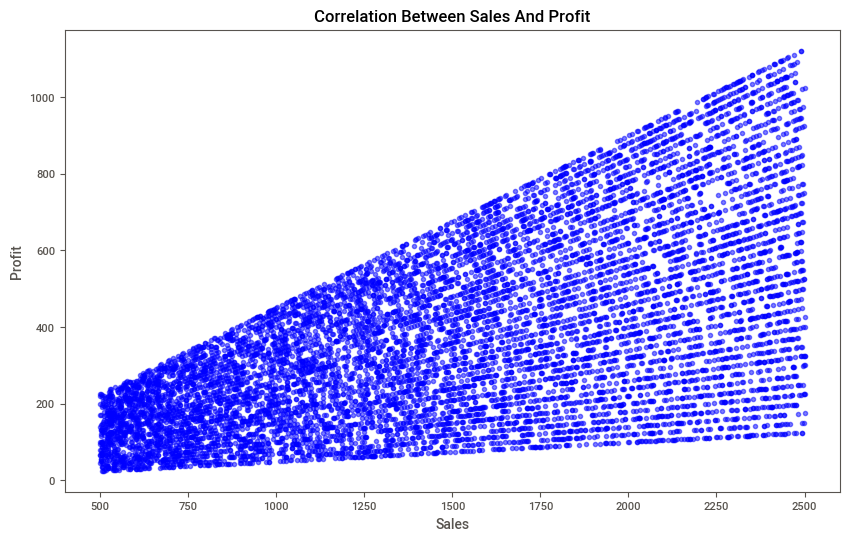

In [46]:
#Membuat plot antara sales dan profit
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Sales'], data_clean['Profit'], color='blue', alpha=0.5)
plt.title('Correlation Between Sales And Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


**Insight: Berdasarkan plot diatas, terdapat korelasi bernilai positif antara kolom sales dan profit. Dengan ini, dapat disimpulkan bahwa ada tren kenaikan pada kedua kolom data tersebut**

### Bagaimana distribusi sales dan profit untuk setiap product?

In [47]:
#Menghitung total penjualan dan keuntungan untuk setiap produk
product_summary = data_clean.groupby('Product')[['Sales', 'Profit']].sum()
print(product_summary)


                      Sales     Profit
Product                               
Atta & Flour         534649  127861.10
Biscuits             684083  169357.62
Breads & Buns        742586  190764.98
Cakes                685612  168398.46
Chicken              520497  124049.89
Chocolates           733898  183849.34
Cookies              768213  190643.70
Dals & Pulses        523371  130232.29
Edible Oil & Ghee    668086  168593.58
Eggs                 575156  144669.92
Fish                 560548  147248.01
Fresh Fruits         551212  134668.35
Fresh Vegetables     525842  131273.33
Health Drinks       1051439  267469.79
Masalas              697480  168999.11
Mutton               611200  151389.40
Noodles              735435  193685.81
Organic Fruits       503402  130862.33
Organic Staples      558929  144136.89
Organic Vegetables   520271  133596.37
Rice                 498323  126932.36
Soft Drinks         1033874  258135.97
Spices               672876  160302.60


**Terdapat 23 baris untuk kolom product dan ditampilkan pula nilai sales serta profit untuk masing-masing product**

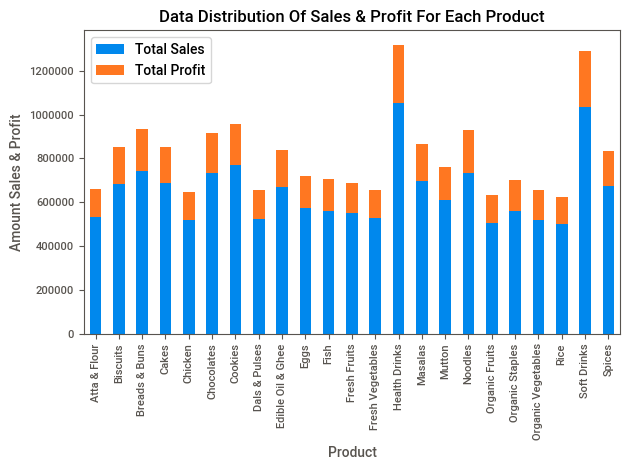

In [48]:
# Membuat bar chart distribusi total penjualan dan keuntungan untuk setiap produk
product_summary.plot(kind='bar', stacked=True)
plt.xlabel('Product')
plt.ylabel('Amount Sales & Profit')
plt.title('Data Distribution Of Sales & Profit For Each Product')
plt.legend(['Total Sales', 'Total Profit'])
plt.tight_layout()
plt.show()

**Insight: Dapat dilihat dari bar chart diatas, product health drinks dan soft drinks adalah kedua product yang memiliki total penjualan dan total keuntungan paling tinggi diantara product lainnya di seluruh kota**

### Bagaimana proporsi sales dari setiap category?

In [49]:
# Menghitung total penjualan untuk setiap produk
category_sales = data_clean.groupby('Category')['Sales'].sum()

# Menghitung total penjualan keseluruhan
total_sales = data_clean['Sales'].sum()

# Menghitung proporsi penjualan untuk setiap produk
category_proportions = category_sales / total_sales

print(category_proportions)

Category
Bakery               0.141224
Beverages            0.139421
Eggs, Meat & Fish    0.151595
Food Grains          0.141424
Fruits & Veggies     0.140451
Oil & Masala         0.136287
Snacks               0.149599
Name: Sales, dtype: float64


**Insight: Dari output diatas, dapat disimpulkan bahwa setiap kategori memiliki porsi persentase penjualan yang tidak jauh berbeda antara 0.13-0.15 atau 13% sampai 15%

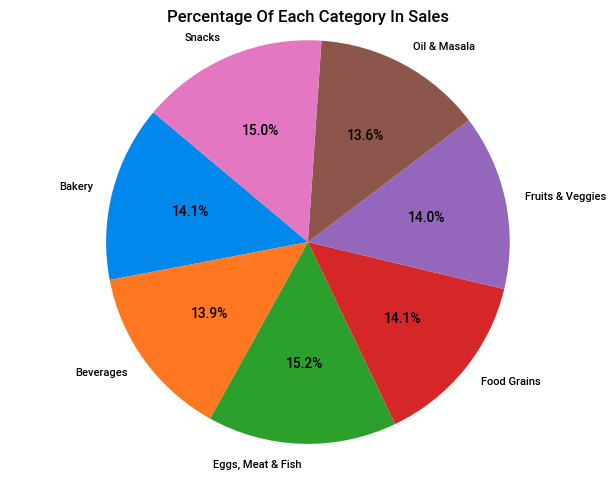

In [50]:
# Membuat pie chart proporsi penjualan dari setiap produk
plt.pie(category_proportions, labels=category_proportions.index, autopct='%.1f%%', startangle=140)
 # Memastikan tampilan lingkaran seimbang
plt.axis('equal') 
plt.title('Percentage Of Each Category In Sales')
plt.tight_layout()
plt.show()

**Insight: Visualisasi yang ditampilkan menggunakan chart menunjukkan bahwa persentase penjualan tertinggi dari product adalah product health drinks. Itu menunjukkan bahwa product health drinks adalah product yang disukai oleh pelanggan**

### Bagaimana distribusi nilai penjualan di berbagai kota? Dari kota mana didapatkan penjualan terendah dan tertinggi?

In [51]:
# Menghitung total Profit untuk setiap kota
city_sales = data_clean.groupby('City')['Sales'].sum()

# Menampilkan sales dari masing-masing kota
city_sales

City
Bodi              667177
Chennai           634963
Coimbatore        634748
Cumbum            626047
Dharmapuri        571553
Dindigul          575631
Kanyakumari       706764
Karur             642273
Krishnagiri       637273
Madurai           617836
Nagercoil         551435
Namakkal          598530
Ooty              599292
Perambalur        659738
Pudukottai        653179
Ramanadhapuram    634386
Salem             657093
Tenkasi           643652
Theni             579553
Tirunelveli       659812
Trichy            541403
Vellore           676550
Viluppuram        581274
Virudhunagar      606820
Name: Sales, dtype: int64

**Insight: Distribusi tingkat penjualan/sales berdasarkan kota cukup merata diantara Rp. 500.000 - Rp. 700.000**

In [52]:
# Menemukan kota dengan sales tertinggi
city_lowest_sales = city_sales.idxmin()
lowest_sales_amount = city_sales.min()

# Menemukan kota dengan sales tertinggi
city_highest_sales = city_sales.idxmax()
highest_sales_amount = city_sales.max()

print(f"Kota dengan tingkat penjualan paling rendah adalah", city_lowest_sales,"dengan jumlah penjualan terendah: Rp.", int(lowest_sales_amount))
print(f"Kota dengan tingkat penjualan paling tinggi adalah", city_highest_sales,"dengan jumlah penjualan tertinggi: Rp.", int(highest_sales_amount))

Kota dengan tingkat penjualan paling rendah adalah Trichy dengan jumlah penjualan terendah: Rp. 541403
Kota dengan tingkat penjualan paling tinggi adalah Kanyakumari dengan jumlah penjualan tertinggi: Rp. 706764


**Dapat dilihat dari output kode diatas, kota Kanyakumari adalah kota yang memiliki nilai sales paling tinggi diantara kota lain dengan nilai sales sebesar Rp.706.764. Sedangkan, kota Trichy adalah kota dengan nilai profit terendah yaitu Rp. 541.403**

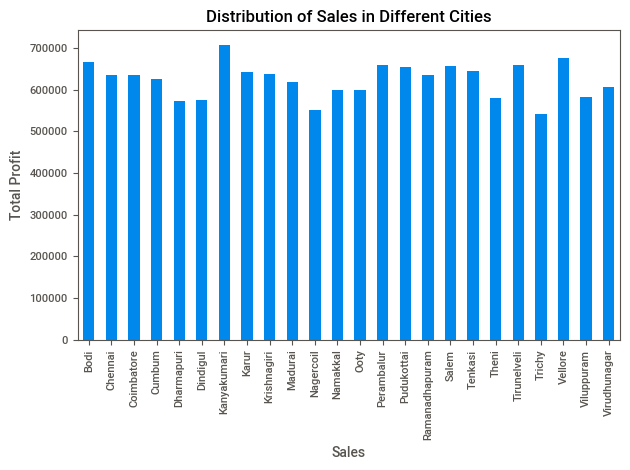

In [53]:
# Membuat bar chart distribusi data profit di berbagai kota
city_sales.plot(kind='bar')
plt.xlabel('Sales')
plt.ylabel('Total Profit')
plt.title('Distribution of Sales in Different Cities')
plt.tight_layout()
plt.show()

**Insight: Dapat dilihat melalui plot tersebut, kota Kanyakumari adalah kota yang bar chart-nya paling tinggi diantara kota lain**

### Berapa nilai rata-rata dan nilai tengah dari kolom sales pada data?

In [54]:
# Menghitung rata-rata dan median total penjualan
average_sales = data_clean['Sales'].mean()
median_sales = data_clean['Sales'].median()
print(f"Rata-rata penjualan dalam data adalah: Rp.", '{:0,.0f}.000'.format(average_sales))
print(f"Nilai tengah penjualan dalam data adalah: Rp.", '{:0,.0f}.000'.format(median_sales))

Rata-rata penjualan dalam data adalah: Rp. 1,497.000
Nilai tengah penjualan dalam data adalah: Rp. 1,498.000


**Insight: Nilai rata-rata dan median dari kolom sales tidak berbeda jauh. Maka dapat diartikan distribusi data untuk kolom sales dianggap sebagai distribusi data normal. Namun untuk memastikan distribusi data tersebut benar-benar normal atau tidak, maka perlu dilakukan perhitungan data lebih lanjut.**

### Apakah terdapat korelasi antara diskon dengan jumlah penjualan?

Hipotesis Nol (H0): Tidak ada korelasi antara tingkat diskon dan jumlah penjualan.


Hipotesis Alternatif (H1): Terdapat korelasi antara tingkat diskon dan jumlah penjualan.

In [55]:
# Menghitung koefisien korelasi dan p-value
correlation, p_value = pearsonr(data_clean['Sales'], data_clean['Discount'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: -0.005512487630014775
P-value: 0.5816209111771501


**Insight : P-Value menunjukkan angka 0.58 yang berarti lebih besar dari confidence interval 0.05. Ini berarti H0 gagal ditolak, artinya tidak ada korelasi antara kolom sales dan kolom discount**

# Pengambilan Kesimpulan

**Berdasarkan hasil analisa diatas, maka kita dapat menyimpulkan :**

- Terdapat korelasi antara kolom sales dan profit, hal ini ditunjukkan oleh p-value > 0.05. Pada scatter plot menunjukkan adanya korelasi kearah nilai positif yang berarti ada tren kenaikan nilai sales dan profit dari waktu ke waktu.
- Distribusi sales dan profit untuk setiap product cukup merata, namun untuk produk health drinks dan soft drinks ada perbedaan yang cukup signifikan, karena kedua produk tersebut memiliki nilai sales dan profit yang tinggi dibanding produk lainnya.
- Proporsi sales untuk setiap kategori cukup merata antara 13-15% pada masing-masing category
- Distribusi nilai sales untuk seluruh kota cukup merata diantara Rp. 500.000 sampai Rp. 700.000. Namun, untuk kota Kanyakumari merupakan kota dengan tingkat penjualan paling tinggi sebanyak Rp. 706.764, dan kota Trichy merupakan kota dengan tingkat penjualan paling rendah yaitu Rp. 541.403
- Nilai rata-rata penjualan dalam data tersebut adalah Rp. 1,497.000 sedangkan nilai tengah penjualan dalam data adalah: Rp. 1,498.000. Data tersebut dapat dianggap sebagai distribusi data normal karena nilai rata-rata dan nilai tengah tidak berbeda jauh.
- Setelah melakukan perhitungan untuk menentukan korelasi antara data diskon dengan data sales, p-value menunjukkan angka 0.58. p-value lebih besar dari 0.05 yang merupakan confidence interval. Apabila p-value > confidence interval, maka H0 gagal ditolak. Ini menunjukkan tidak adanya korelasi antara kolom sales dan kolom discount. Singkatnya, tidak ada keterkaitan antara tingkat penjualan tinggi yang disebabkan oleh diskon yang besar.